# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#getting the url
weatherUrl = "http://api.openweathermap.org/data/2.5/weather?"
#setting the unit types to imperial (this is specifically being use for temperatures in Fahrenheit)
unitType = "imperial"

#bruilding partial query URL (missing the city specification)
queryUrl = f"{weatherUrl}appid={weather_api_key}&units={unitType}&q="


In [4]:
#testing the request url to see if it works
#also getting the keys name. this is so I can call them in the for loop below
weatherResponse = requests.get(queryUrl + city).json()
print(json.dumps(weatherResponse, indent=4))

{
    "coord": {
        "lon": -68.3,
        "lat": -54.8
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 33.46,
        "feels_like": 33.46,
        "temp_min": 33.46,
        "temp_max": 33.46,
        "pressure": 1016,
        "humidity": 93
    },
    "visibility": 10000,
    "wind": {
        "speed": 2.3,
        "deg": 360
    },
    "clouds": {
        "all": 40
    },
    "dt": 1659527165,
    "sys": {
        "type": 1,
        "id": 8303,
        "country": "AR",
        "sunrise": 1659529117,
        "sunset": 1659560404
    },
    "timezone": -10800,
    "id": 3833367,
    "name": "Ushuaia",
    "cod": 200
}


In [5]:
#creating the lists to hold the city info
cityName = []
cityCountry = []
cityDate = []
   ##in coord section
cityLat = []
cityLong = []
   ##in main section
cityTemp = []
cityHum = []
   ##in clouds section
cityCloud = []
   ##in wind section
cityWind = []

#creating a counter to print out the location
counter = 0


In [6]:
#printing out the start of the gathing data process to inform the user
print("Starting to gather the city data")
print("This data includes: Name, Country, Lat/Long, Temperature, Humidity, Cloudiness, and Wind Speed")
print(f"----------------------------------------------------------------------------------------------")

#using a for loop to traverse the city list and append the city to the queryUrl
#including a try and catch just in case the cities are not found
for city1 in cities:
    try:
        #creating the url request for each city
        cityResponse = requests.get(queryUrl + city1).json()
        
        #appending the current cities infomation to the list initialzed above
        cityLong.append(cityResponse["coord"]["lon"])
        cityLat.append(cityResponse["coord"]["lat"])
        cityTemp.append(cityResponse["main"]["temp_max"])
        cityHum.append(cityResponse["main"]["humidity"])
        cityWind.append(cityResponse["wind"]["speed"])
        cityCloud.append(cityResponse["clouds"]["all"])
        cityDate.append(cityResponse["dt"])
        cityCountry.append(cityResponse["sys"]["country"])
        
        #getting a new list of city names, this excludes the cities that were not found
        cityName.append(cityResponse["name"])
        counter += 1
        
        print(f"collecting data for city {city1}, city number: {counter}")
        
    except:
        print(f"{city1} was not found. Proceeding to the next city")

    continue


Starting to gather the city data
This data includes: Name, Country, Lat/Long, Temperature, Humidity, Cloudiness, and Wind Speed
----------------------------------------------------------------------------------------------
collecting data for city belyy yar, city number: 1
collecting data for city bone, city number: 2
collecting data for city ushuaia, city number: 3
collecting data for city ribeira grande, city number: 4
collecting data for city broome, city number: 5
collecting data for city bluff, city number: 6
collecting data for city busselton, city number: 7
collecting data for city jawhar, city number: 8
collecting data for city havoysund, city number: 9
collecting data for city koshurnikovo, city number: 10
collecting data for city hermanus, city number: 11
amderma was not found. Proceeding to the next city
collecting data for city rikitea, city number: 12
collecting data for city beberibe, city number: 13
collecting data for city xai-xai, city number: 14
collecting data for ci

collecting data for city bambous virieux, city number: 147
taolanaro was not found. Proceeding to the next city
collecting data for city inongo, city number: 148
collecting data for city obihiro, city number: 149
collecting data for city bell ville, city number: 150
collecting data for city bredasdorp, city number: 151
collecting data for city port macquarie, city number: 152
jomalig was not found. Proceeding to the next city
ardistan was not found. Proceeding to the next city
collecting data for city buala, city number: 153
collecting data for city alta floresta, city number: 154
collecting data for city carnarvon, city number: 155
collecting data for city batagay, city number: 156
attawapiskat was not found. Proceeding to the next city
collecting data for city korla, city number: 157
collecting data for city moshi, city number: 158
collecting data for city codrington, city number: 159
collecting data for city barrow, city number: 160
collecting data for city okha, city number: 161
co

collecting data for city placido de castro, city number: 284
collecting data for city pattani, city number: 285
palabuhanratu was not found. Proceeding to the next city
collecting data for city upernavik, city number: 286
collecting data for city nha trang, city number: 287
collecting data for city ampanihy, city number: 288
collecting data for city meadow lake, city number: 289
collecting data for city pangnirtung, city number: 290
collecting data for city vaitape, city number: 291
collecting data for city sobolevo, city number: 292
collecting data for city egvekinot, city number: 293
collecting data for city labytnangi, city number: 294
collecting data for city stornoway, city number: 295
collecting data for city semnan, city number: 296
samusu was not found. Proceeding to the next city
collecting data for city goderich, city number: 297
collecting data for city sur, city number: 298
collecting data for city plettenberg bay, city number: 299
collecting data for city bandar-e anzali, 

collecting data for city grand-lahou, city number: 431
collecting data for city sabang, city number: 432
collecting data for city vyritsa, city number: 433
collecting data for city salinopolis, city number: 434
collecting data for city rawson, city number: 435
collecting data for city bela, city number: 436
collecting data for city northam, city number: 437
collecting data for city petrolina, city number: 438
collecting data for city harrisonburg, city number: 439
collecting data for city mahanoro, city number: 440
collecting data for city jacqueville, city number: 441
collecting data for city udachnyy, city number: 442
collecting data for city arlit, city number: 443
collecting data for city grand island, city number: 444
collecting data for city anchorage, city number: 445
collecting data for city teguise, city number: 446
collecting data for city keita, city number: 447
collecting data for city camacha, city number: 448
collecting data for city alofi, city number: 449
tabialan was n

collecting data for city san pedro, city number: 578
collecting data for city darhan, city number: 579
collecting data for city port hawkesbury, city number: 580
collecting data for city river falls, city number: 581


In [7]:
print("------------------------")
print("    Data collected!")
print("------------------------")

------------------------
    Data collected!
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#compiling all lists into one dataframe
weatherData = {"City Name": cityName,
    "Country Code": cityCountry,
    "City Data": cityDate,
    "City Latitude": cityLat,
    "City Longitude": cityLong,
    "City Temperature": cityTemp,
    "City Humidity": cityHum,
    "City Cloudiness": cityCloud,
    "City Wind Speed": cityWind}

#converting into dataframe
weatherDF = pd.DataFrame(weatherData)

In [9]:
#printing out the weather dataframe
weatherDF.head(100)

,City Name,Country Code,City Data,City Latitude,City Longitude,City Temperature,City Humidity,City Cloudiness,City Wind Speed
0,Belyy Yar,RU,1659527165,53.6039,91.3903,68.86,56,0,8.95
1,Bone,DE,1659527166,51.9669,12.1396,91.81,27,53,4.59
2,Ushuaia,AR,1659527165,-54.8000,-68.3000,33.46,93,40,2.30
3,Ribeira Grande,PT,1659527166,38.5167,-28.7000,79.20,89,40,9.22
4,Broome,US,1659527142,42.2506,-75.8330,64.54,90,0,1.99
...,...,...,...,...,...,...,...,...,...
95,Wucheng,CN,1659527205,29.6008,118.1750,84.36,74,53,1.07
96,Hobart,AU,1659527205,-42.8794,147.3294,54.27,77,20,4.61
97,Tczew,PL,1659527206,54.0924,18.7779,85.64,100,8,10.02
98,Sirte,LY,1659527206,31.2089,16.5887,85.12,57,0,10.67


In [10]:
#exporting the datafame into a csv file

#setting the location of the file
output_data_file = "output_data/cities.csv"

#exporting the df to the file listed above, with the name listed above
weatherDF.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#creating a new df where the cities with humidities are greater than 100

In [12]:
#  Get the indices of cities that have humidity over 100%.


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This scatter plot below is showing the temperature across the earth's latitude.


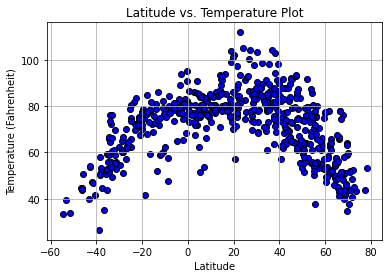

In [14]:
#plotting the latitude v temperature plot

#plotting the base scatterplot with plt
plt.scatter(cityLat, cityTemp, marker="o", facecolors="blue", edgecolors="black")

#creating a title, x label, and y label for the chart
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid(True)

#giving a little description of what the scatterplot is showing
print("This scatter plot below is showing the temperature across the earth's latitude.")

#exporting the scatterplot to a png and saving it in the data_export file
plt.savefig("output_data/LatitudeVTemperaturePlot.png")


## Latitude vs. Humidity Plot

This scatter plot below is showing the humidity across the earth's latitude.


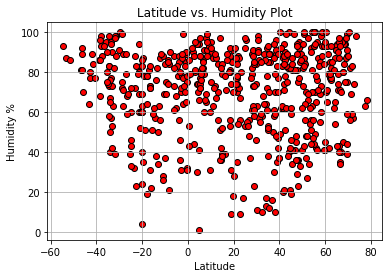

In [15]:
#plotting the latitude v humidity plot

#plotting the base scatterplot with plt
plt.scatter(cityLat, cityHum, marker="o", facecolors="red", edgecolors="black")

#creating a title, x label, and y label for the chart
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

#giving a little description of what the scatterplot is showing
print("This scatter plot below is showing the humidity across the earth's latitude.")

#exporting the scatterplot to a png and saving it in the output_data file
plt.savefig("output_data/LatitudeVHumidityPlot.png")


## Latitude vs. Cloudiness Plot

This scatter plot below is showing the cloudiness across the earth's latitude.


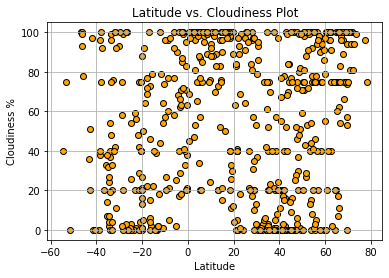

In [16]:
#plotting the latitude v cloudiness plot

#plotting the base scatterplot with plt
plt.scatter(cityLat, cityCloud, marker="o", facecolors="orange", edgecolors="black")

#creating a title, x label, and y label for the chart
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

#giving a little description of what the scatterplot is showing
print("This scatter plot below is showing the cloudiness across the earth's latitude.")

#exporting the scatterplot to a png and saving it in the data_export file
plt.savefig("output_data/LatitudeVCloudinessPlot.png")



## Latitude vs. Wind Speed Plot

This scatter plot below is showing the wind speed across the earth's latitude.


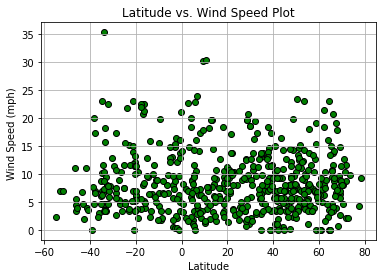

In [17]:
#plotting the latitude v wind speed plot

#plotting the base scatterplot with plt
plt.scatter(cityLat, cityWind, marker="o", facecolors="green", edgecolors="black")

#creating a title, x label, and y label for the chart
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph) ")
plt.grid(True)

#giving a little description of what the scatterplot is showing
print("This scatter plot below is showing the wind speed across the earth's latitude.")

#exporting the scatterplot to a png and saving it in the data_export file
plt.savefig("output_data/LatitudeVWindSpeedPlot.png")


## Linear Regression

In [18]:
#first im creating two dataframes to make the northen/southern hemisphere plots from 
#using the .loc function on the dataframe I created
northDF = weatherDF.loc[weatherDF["City Latitude"] >= 0.0]
northDF.reset_index(inplace=True)

southDF = weatherDF.loc[weatherDF["City Latitude"] < 0.0]
southDF.reset_index(inplace=True)

In [19]:
#defining the def plotLinearRegression function to create a generic plot to reference back to for each of the required plots
#this will make it easier to compute each equation, instead of writing out the equation with new variable names each time

#adding the table's x and y value, title, x and y labels and equation position
def plotLinearRegression(xVal,yVal,plotTitle,xLabel,yLabel,labelPos,plotFig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xVal, yVal)
    #printing the r value for each scatter plot
    print(f"The r value is: {rvalue}")
    regressVal = xVal * slope + intercept
    lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xVal,yVal,marker="o", facecolors="violet", edgecolors="black")
    plt.plot(xVal,regressVal,"r-")
    plt.annotate(lineEquation,labelPos,fontsize=15,color="red")
    plt.title(plotTitle)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.savefig(f"output_data/fig{plotFig}.png")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6198934370487792


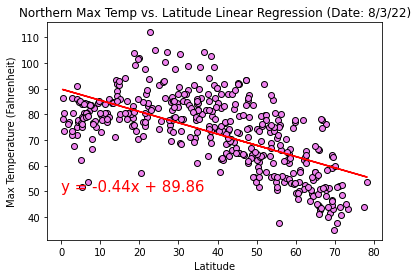

In [20]:
#norther hemisphere max temp v latitude with linear regression
plotTitle = "Northern Max Temp vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Max Temperature (Fahrenheit)"
labelPos = (0, 50)
plotLinearRegression(northDF["City Latitude"], northDF["City Temperature"],plotTitle, xLabel, yLabel, labelPos, 1)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7738075539974036


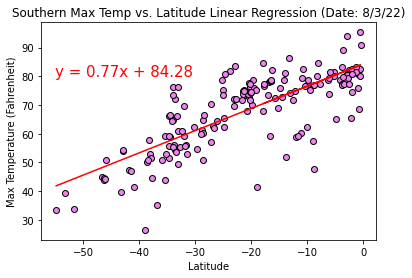

In [21]:
#southern hemisphere max temp v latitude with linear regression
plotTitle = "Southern Max Temp vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Max Temperature (Fahrenheit)"
labelPos = (-55, 80)
plotLinearRegression(southDF["City Latitude"], southDF["City Temperature"],plotTitle, xLabel, yLabel, labelPos, 2)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022514795834375115


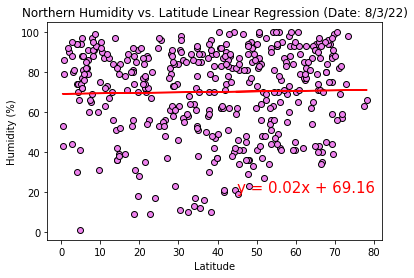

In [22]:
#norther hemisphere humidity v latitude with linear regression
plotTitle = "Northern Humidity vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Humidity (%)"
labelPos = (45, 20)
plotLinearRegression(northDF["City Latitude"], northDF["City Humidity"],plotTitle, xLabel, yLabel, labelPos, 3)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.2213732756329871


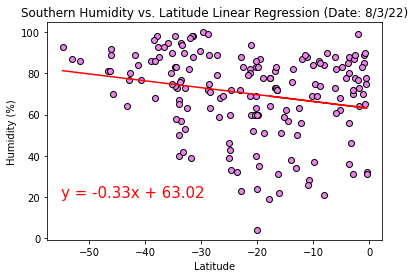

In [23]:
#southern hemisphere humidity v latitude with linear regression
plotTitle = "Southern Humidity vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Humidity (%)"
labelPos = (-55, 20)
plotLinearRegression(southDF["City Latitude"], southDF["City Humidity"],plotTitle, xLabel, yLabel, labelPos, 4)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04377161462935303


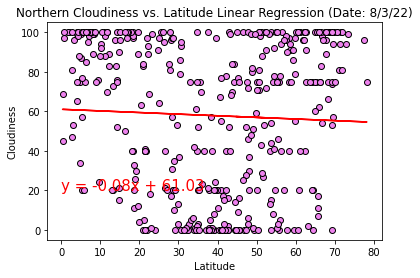

In [24]:
#northern hemisphere cloudiness v latitude with linear regression
plotTitle = "Northern Cloudiness vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Cloudiness"
labelPos = (0, 20)
plotLinearRegression(northDF["City Latitude"], northDF["City Cloudiness"],plotTitle, xLabel, yLabel, labelPos, 5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0742319811051361


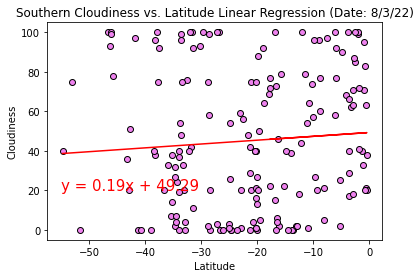

In [25]:
#southern hemisphere cloudiness v latitude with linear regression
plotTitle = "Southern Cloudiness vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Cloudiness"
labelPos = (-55, 20)
plotLinearRegression(southDF["City Latitude"], southDF["City Cloudiness"],plotTitle, xLabel, yLabel, labelPos, 6)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.024350472376669062


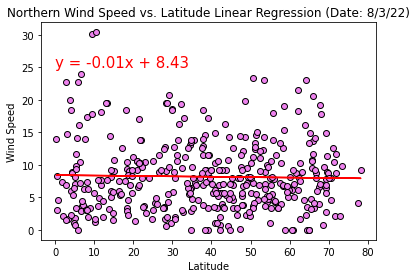

In [26]:
#northern hemisphere wind speed v latitude with linear regression
plotTitle = "Northern Wind Speed vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Wind Speed"
labelPos = (0, 25)
plotLinearRegression(northDF["City Latitude"], northDF["City Wind Speed"],plotTitle, xLabel, yLabel, labelPos, 7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04964255981275227


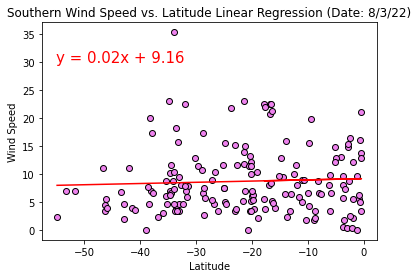

In [27]:
#Southern hemisphere Wind Speed v latitude with linear regression
plotTitle = "Southern Wind Speed vs. Latitude Linear Regression (Date: 8/3/22)"
xLabel = "Latitude"
yLabel = "Wind Speed"
labelPos = (-55, 30)
plotLinearRegression(southDF["City Latitude"], southDF["City Wind Speed"],plotTitle, xLabel, yLabel, labelPos, 8)